In [32]:
import numpy as np
import statsmodels.api as sm
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
import os
import random
import patsy
import statsmodels.formula.api as smf
from statsmodels.stats.anova import AnovaRM
from statsmodels.regression.mixed_linear_model import MixedLMResults
from scipy import stats
import seaborn as sns

In [2]:
#pd.set_option('display.float_format', '{:.2f}'.format)
#pd.options.mode.chained_assignment = None
import warnings
warnings.filterwarnings('ignore')

# Import dataset

In [103]:
df = pd.read_csv('Family Income and Expenditure.csv')
df = df[["Total Household Income","Region","Total Food Expenditure","Clothing, Footwear and Other Wear Expenditure","Medical Care Expenditure","Main Source of Income","Household Head Class of Worker","Type of Household","Total Number of Family members","Total number of family members employed","Type of Building/House","Tenure Status","Number of Car, Jeep, Van","Number of Personal Computer"]]

#replace NaN values:
df['Household Head Class of Worker'] = df['Household Head Class of Worker'].fillna('No Job/Business')

df.head(10)

Total Household Income  ... Number of Personal Computer
0                  480332  ...                           1
1                  198235  ...                           1
2                   82785  ...                           0
3                  107589  ...                           0
4                  189322  ...                           0
5                  152883  ...                           0
6                  198621  ...                           0
7                  134961  ...                           0
8                  171152  ...                           0
9                  625753  ...                           1

[10 rows x 14 columns]

In [105]:
df.to_csv('dataset.csv',index=False)

# Descritive statistics

In [104]:
df.describe()

Total Household Income  ...  Number of Personal Computer
count            4.154400e+04  ...                 41544.000000
mean             2.475556e+05  ...                     0.315015
std              2.868805e+05  ...                     0.739698
min              1.128500e+04  ...                     0.000000
25%              1.048950e+05  ...                     0.000000
50%              1.640795e+05  ...                     0.000000
75%              2.911385e+05  ...                     0.000000
max              1.181599e+07  ...                     6.000000

[8 rows x 8 columns]

In [106]:
#the mean value of dependent variable in different regions
df.groupby(['Region'])['Total Household Income'].mean()

Region
 ARMM                        134746.817616
CAR                          269540.484638
Caraga                       196907.376543
I - Ilocos Region            238110.084327
II - Cagayan Valley          236778.221721
III - Central Luzon          292965.181650
IVA - CALABARZON             303360.536040
IVB - MIMAROPA               216685.124900
IX - Zasmboanga Peninsula    191000.908277
NCR                          420861.861501
V - Bicol Region             186105.492718
VI - Western Visayas         220481.260260
VII - Central Visayas        234909.314050
VIII - Eastern Visayas       196736.581087
X - Northern Mindanao        214057.779544
XI - Davao Region            238115.891251
XII - SOCCSKSARGEN           182984.802545
Name: Total Household Income, dtype: float64

In [84]:
#the mean value of dependent variable for different main source of income
df.groupby(['Main Source of Income'])['Total Household Income'].mean()

Main Source of Income
Enterpreneurial Activities    213484.383721
Other sources of Income       242638.827243
Wage/Salaries                 267414.952080
Name: Total Household Income, dtype: float64

In [85]:
#the mean value of dependent variable by household head class of worker
df.groupby(['Household Head Class of Worker'])['Total Household Income'].mean()

Household Head Class of Worker
Employer in own family-operated farm or business              359488.916699
No Job/Business                                               285650.601247
Self-employed wihout any employee                             198160.255702
Worked for government/government corporation                  426543.854255
Worked for private establishment                              220260.745321
Worked for private household                                  189454.711467
Worked with pay in own family-operated farm or business       447975.428571
Worked without pay in own family-operated farm or business    311922.526316
Name: Total Household Income, dtype: float64

In [86]:
#the mean value of dependent variable for different type of household
df.groupby(['Type of Household'])['Total Household Income'].mean()

Type of Household
Extended Family                           308349.946721
Single Family                             219228.541677
Two or More Nonrelated Persons/Members    364741.532934
Name: Total Household Income, dtype: float64

In [87]:
#the mean value of dependent variable for different type of buiding/house
df.groupby(['Type of Building/House'])['Total Household Income'].mean()

Type of Building/House
Commercial/industrial/agricultural building    337213.980392
Duplex                                         298840.435424
Institutional living quarter                   234019.666667
Multi-unit residential                         346994.468021
Other building unit (e.g. cave, boat)          218683.000000
Single house                                   242637.617523
Name: Total Household Income, dtype: float64

In [ ]:
#the mean value of dependent variable for different tenure status
df.groupby(['Tenure Status'])['Total Household Income'].mean()

Tenure Status
Not Applicable                                       208552.041096
Own house, rent lot                                  206998.764706
Own house, rent-free lot with consent of owner       156061.919546
Own house, rent-free lot without consent of owner    206610.708543
Own or owner-like possession of house and lot        268090.491893
Rent house/room including lot                        310202.060826
Rent-free house and lot with consent of owner        193210.918073
Rent-free house and lot without consent of owner     167092.984375
Name: Total Household Income, dtype: float64

# Correlation Matrix of Numerical Variables

In [155]:
df.corr()

Total_Household_Income  ...  Number_of_Personal_Computer
Total_Household_Income                                       1.000000  ...                     0.557561
Total_Food_Expenditure                                       0.663660  ...                     0.504225
Clothing,_Footwear_and_Other_Wear_Expenditure                0.605992  ...                     0.490750
Medical_Care_Expenditure                                     0.304145  ...                     0.177447
Total_Number_of_Family_members                               0.145149  ...                     0.053166
Total_number_of_family_members_employed                      0.211099  ...                     0.111184
Number_of_Car,_Jeep,_Van                                     0.546663  ...                     0.423323
Number_of_Personal_Computer                                  0.557561  ...                     1.000000

[8 rows x 8 columns]

# Data Visualization

In [109]:
numerical = ["Total Household Income","Total Food Expenditure","Clothing, Footwear and Other Wear Expenditure","Medical Care Expenditure","Total Number of Family members","Total number of family members employed","Number of Car, Jeep, Van","Number of Personal Computer"]
continuous = ["Total Household Income","Total Food Expenditure","Clothing, Footwear and Other Wear Expenditure","Medical Care Expenditure"]
categorical = ["Region","Main Source of Income","Household Head Class of Worker","Type of Household","Type of Building/House","Tenure Status"]
              

## Histogram of Total Household Income

Because the distribution of Total Household Income is too severely skewed to the right, to display the distribution clearly, I had to seperate Household Income <= 2000000 and Household Income > 2000000 into two graphs.

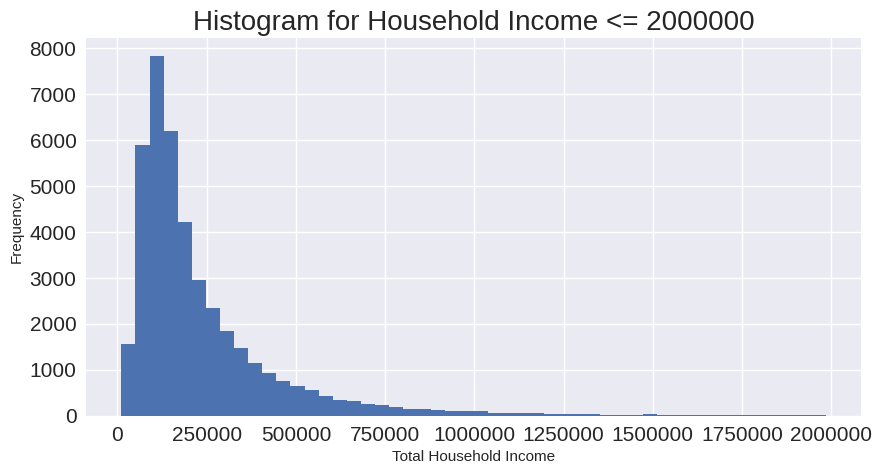

In [110]:
%matplotlib inline
plt.rcParams.update({'figure.figsize':(10,5), 'figure.dpi':100})
#plt.style.use('ggplot')

low =  df[df['Total Household Income'] <= 2000000]

# Plot Histogram on x
plt.hist(low["Total Household Income"], bins=50)
plt.gca().set(title='Histogram for Household Income <= 2000000', ylabel='Frequency',xlabel='Total Household Income');
plt.style.use('seaborn')
plt.ticklabel_format(style='plain', axis='x')

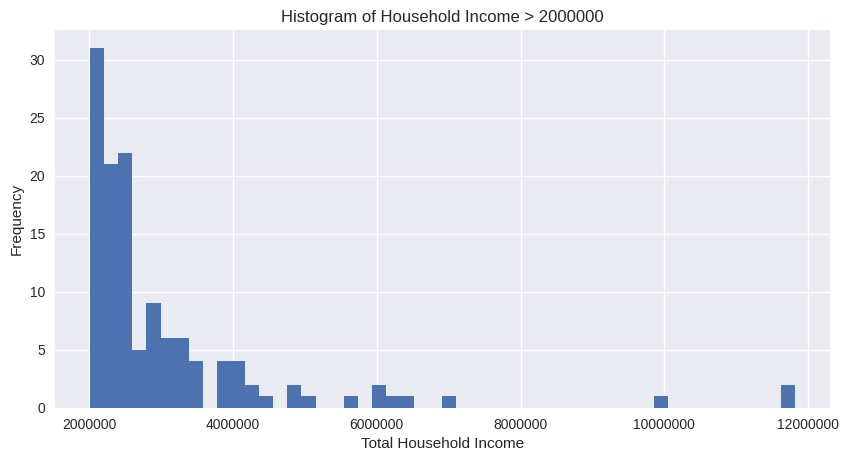

In [92]:
plt.rcParams.update({'figure.figsize':(10,5), 'figure.dpi':100})
high =  df[df['Total Household Income'] > 2000000]

plt.hist(high["Total Household Income"], bins=50)
plt.gca().set(title='Histogram of Household Income > 2000000', ylabel='Frequency',xlabel='Total Household Income');
plt.style.use('seaborn')
plt.ticklabel_format(style='plain', axis='x')

## Histograms of continuous variables

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3985ad0490>,
      dtype=object)

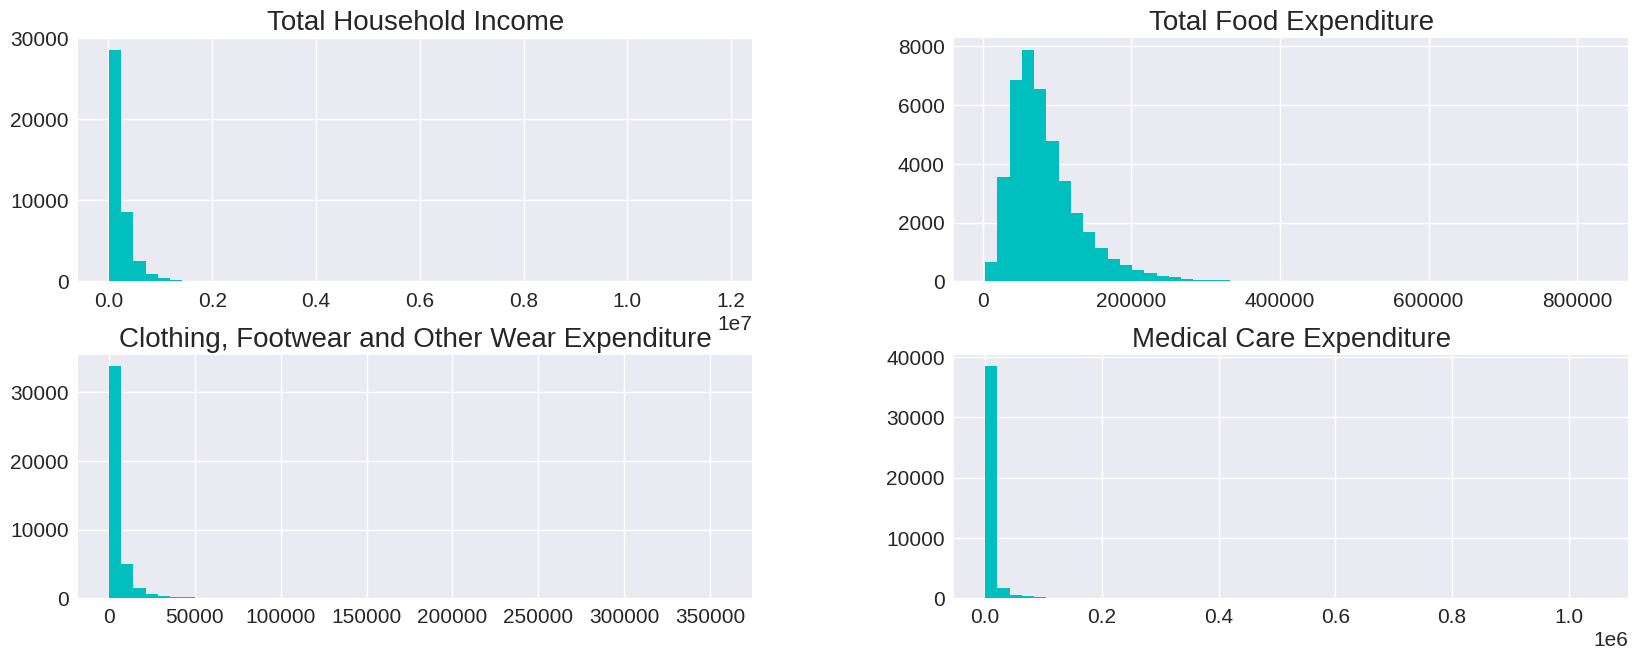

In [111]:
import matplotlib

params = {'axes.titlesize':'20',
          'xtick.labelsize':'15',
          'ytick.labelsize':'15'}
matplotlib.rcParams.update(params)
df[continuous].hist(bins=50, figsize=(20, 20), layout=(5, 2),color = 'c')

## Correlation between 4 Main Continuous Variables

In [114]:
import plotly.express as px

fig = px.scatter_matrix(df, dimensions=["Total Household Income","Total Food Expenditure","Clothing, Footwear and Other Wear Expenditure","Medical Care Expenditure"],width=1300, height=1200)
fig.show()

## Correlation between Categorical Variables and Total Household Income

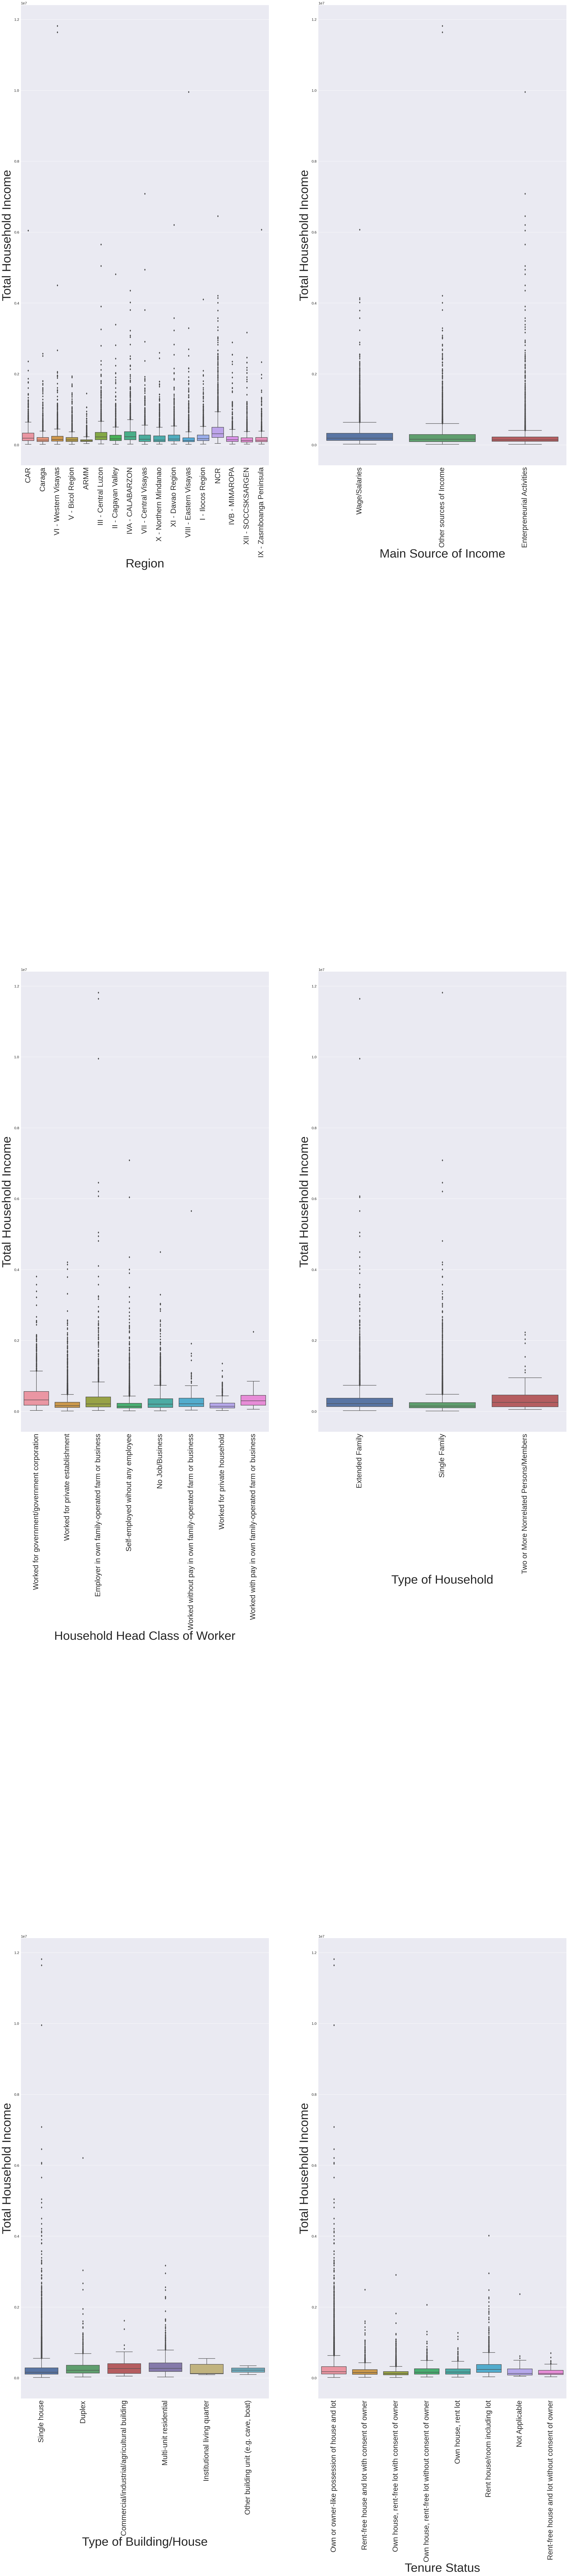

In [116]:
import seaborn as sns


fig, ax = plt.subplots(3, 2, figsize=(40, 180))
for var, subplot in zip(categorical, ax.flatten()):
    ax = sns.boxplot(x=var, y='Total Household Income', data=df, ax=subplot)
    ax.set_xlabel(var,fontsize=50)
    ax.set_ylabel("Total Household Income",fontsize=50)

    ax.set_xticklabels(ax.get_xticklabels(),rotation=90,fontsize=30)

    ax
plt.subplots_adjust(hspace = 1.1)

## Correlation Matrix of Numerical Variables

In [154]:
corr = df.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))


params = {'axes.titlesize':'20',
          'xtick.labelsize':'15',
          'ytick.labelsize':'15'}
matplotlib.rcParams.update(params)

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, annot=True, annot_kws={"fontsize":15},
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [118]:
#Rename Columns
df.columns = df.columns.str.replace(' ', '_')
df.columns = df.columns.str.replace('/', '_')

# Linear regression

In [119]:
df.dtypes

Total_Household_Income                            int64
Region                                           object
Total_Food_Expenditure                            int64
Clothing,_Footwear_and_Other_Wear_Expenditure     int64
Medical_Care_Expenditure                          int64
Main_Source_of_Income                            object
Household_Head_Class_of_Worker                   object
Type_of_Household                                object
Total_Number_of_Family_members                    int64
Total_number_of_family_members_employed           int64
Type_of_Building_House                           object
Tenure_Status                                    object
Number_of_Car,_Jeep,_Van                          int64
Number_of_Personal_Computer                       int64
dtype: object

### Create Dummy Variables for Categorical Variables

In [146]:
from sklearn import linear_model

X = df[["Region","Total_Food_Expenditure","Clothing,_Footwear_and_Other_Wear_Expenditure","Medical_Care_Expenditure","Main_Source_of_Income","Household_Head_Class_of_Worker","Type_of_Household","Total_Number_of_Family_members","Total_number_of_family_members_employed","Type_of_Building_House","Tenure_Status","Number_of_Car,_Jeep,_Van","Number_of_Personal_Computer"]]
y = df["Total_Household_Income"]

X = pd.get_dummies(data=X, drop_first=True)
X.head()

Total_Food_Expenditure  ...  Tenure_Status_Rent-free house and lot without consent of owner
0                  117848  ...                                                  0             
1                   67766  ...                                                  0             
2                   61609  ...                                                  0             
3                   78189  ...                                                  0             
4                   94625  ...                                                  0             

[5 rows x 46 columns]

### Slipt Dataset into Traning and Testing Data

In [147]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(24926, 46)
(16618, 46)
(24926,)
(16618,)


In [148]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Print out Intercept and Coefficients

In [149]:
print(model.intercept_)

116708.66406541607


In [150]:
coeff_parameter = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])
coeff_parameter

Coefficient
Total_Food_Expenditure                                   1.913850
Clothing,_Footwear_and_Other_Wear_Expenditure            8.677604
Medical_Care_Expenditure                                 1.524161
Total_Number_of_Family_members                       -7402.990456
Total_number_of_family_members_employed              17983.014541
Number_of_Car,_Jeep,_Van                            193272.108770
Number_of_Personal_Computer                          52732.229182
Region_CAR                                           -2302.580612
Region_Caraga                                        -8510.182014
Region_I - Ilocos Region                            -12075.166287
Region_II - Cagayan Valley                            7651.849633
Region_III - Central Luzon                           -4663.626479
Region_IVA - CALABARZON                             -12921.797521
Region_IVB - MIMAROPA                                16630.722801
Region_IX - Zasmboanga Peninsula                     -1499.373254
Region_NCR                                           49767.762560
Region_V - Bicol Region                             -17678.604505
Region_VI - Western Visayas                             13.687098
Region_VII - Central Visayas                         -1612.960224
Region_VIII - Eastern Visayas                         7557.116091
Region_X - Northern Mindanao                         17615.830350
Region_XI - Davao Region                              3371.973903
Region_XII - SOCCSKSARGEN                           -19636.477834
Main_Source_of_Income_Other sources of Income        -8278.831608
Main_Source_of_Income_Wage/Salaries                 -16643.702044
Household_Head_Class_of_Worker_No Job/Business      -28798.576830
Household_Head_Class_of_Worker_Self-employed wi...  -34434.484544
Household_Head_Class_of_Worker_Worked for gover...   -8956.286518
Household_Head_Class_of_Worker_Worked for priva...  -48888.690698
Household_Head_Class_of_Worker_Worked for priva...  -46176.905003
Household_Head_Class_of_Worker_Worked with pay ... -101441.377083
Household_Head_Class_of_Worker_Worked without p...    2305.927857
Type_of_Household_Single Family                      -9005.479350
Type_of_Household_Two or More Nonrelated Person...  -11388.380553
Type_of_Building_House_Duplex                       -39857.736100
Type_of_Building_House_Institutional living qua... -121938.231080
Type_of_Building_House_Multi-unit residential       -35359.435877
Type_of_Building_House_Other building unit (e.g...  -47476.035348
Type_of_Building_House_Single house                 -29011.406645
Tenure_Status_Own house, rent lot                   -39946.950478
Tenure_Status_Own house, rent-free lot with con...  -38359.085231
Tenure_Status_Own house, rent-free lot without ...  -39915.964793
Tenure_Status_Own or owner-like possession of h...  -25827.560133
Tenure_Status_Rent house/room including lot         -37964.456963
Tenure_Status_Rent-free house and lot with cons...  -33202.205908
Tenure_Status_Rent-free house and lot without c...  -39758.012945

In [151]:
predictions = model.predict(X_test)   #prediction of dependent variable in test data
predictions

array([228608.59687035, 191150.972047  , 643437.40940543, ...,
        90945.8588302 ,  54708.88665672, 136396.72450184])

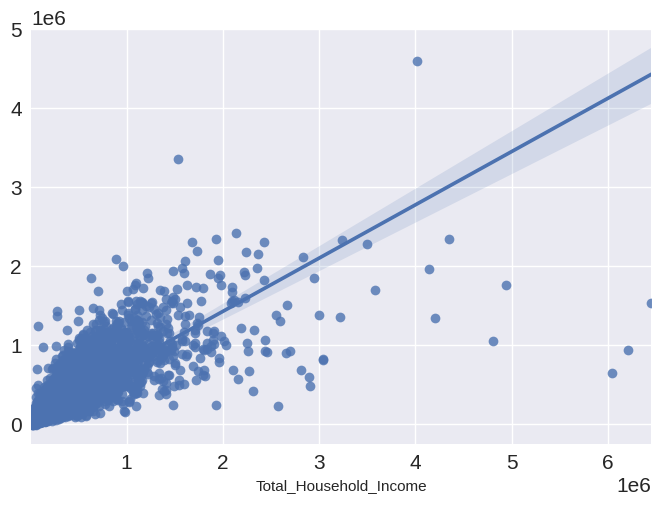

In [152]:
sns.regplot(y_test,predictions)

In [156]:
import statsmodels.api as sm
X_train_Sm= sm.add_constant(X_train)

ls=sm.OLS(y_train,X_train_Sm).fit()
print(ls.summary())

                              OLS Regression Results                              
Dep. Variable:     Total_Household_Income   R-squared:                       0.620
Model:                                OLS   Adj. R-squared:                  0.619
Method:                     Least Squares   F-statistic:                     883.1
Date:                    Sat, 10 Apr 2021   Prob (F-statistic):               0.00
Time:                            23:36:35   Log-Likelihood:            -3.3678e+05
No. Observations:                   24926   AIC:                         6.737e+05
Df Residuals:                       24879   BIC:                         6.740e+05
Df Model:                              46                                         
Covariance Type:                nonrobust                                         
                                                                                                coef    std err          t      P>|t|      [0.025      0.975]
------------

# ANOVA

## Region & Main Source of Income

In [141]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

#perform 2-way ANOVA
lm = ols('Total_Household_Income ~ C(Region)+ C(Main_Source_of_Income)+C(Region):C(Main_Source_of_Income)',data=df).fit()
sm.stats.anova_lm(lm, typ=2)

sum_sq  ...        PR(>F)
C(Region)                           1.955916e+14  ...  0.000000e+00
C(Main_Source_of_Income)            1.755501e+12  ...  1.090696e-05
C(Region):C(Main_Source_of_Income)  1.652911e+13  ...  6.020757e-29
Residual                            3.186603e+15  ...           NaN

[4 rows x 4 columns]

In [142]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

normality_plot, stat = stats.probplot(lm.resid, plot= plt, rvalue= True)
ax.set_title("Probability plot of model residual's", fontsize= 20)
ax.set

plt.show()

## Main Source of Income & Household Head Class of Worker

In [131]:
#perform 2-way ANOVA
model = ols('Total_Household_Income ~ C(Main_Source_of_Income) + C(Household_Head_Class_of_Worker) + C(Main_Source_of_Income):C(Household_Head_Class_of_Worker)', data=df).fit()
sm.stats.anova_lm(model, typ=2)

sum_sq  ...        PR(>F)
C(Main_Source_of_Income)                            1.709194e+13  ...  1.346190e-48
C(Household_Head_Class_of_Worker)                   1.787251e+14  ...  0.000000e+00
C(Main_Source_of_Income):C(Household_Head_Class...  9.459832e+12  ...  2.356472e-19
Residual                                            3.210539e+15  ...           NaN

[4 rows x 4 columns]

In [132]:
fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

normality_plot, stat = stats.probplot(model.resid, plot= plt, rvalue= True)
ax.set_title("Probability plot of model residual's", fontsize= 20)
ax.set

plt.show()

## Type of Household & Type of Building/House & Tenure Status

In [133]:
#perform 3-way ANOVA
model = ols('Total_Household_Income ~ C(Type_of_Household)+C(Type_of_Building_House)+ C(Tenure_Status)+ C(Type_of_Household):C(Type_of_Building_House)+C(Type_of_Building_House):C(Tenure_Status)+C(Type_of_Household):C(Tenure_Status)', data=df).fit()

sm.stats.anova_lm(model, typ=3)

sum_sq  ...    PR(>F)
Intercept                                       4.775609e+10  ...  0.435231
C(Type_of_Household)                            1.767640e+11  ...  0.324089
C(Type_of_Building_House)                       2.387805e+11  ...  0.435231
C(Tenure_Status)                                3.342926e+11  ...  0.435231
C(Type_of_Household):C(Type_of_Building_House)  4.775609e+11  ...  0.435231
C(Type_of_Building_House):C(Tenure_Status)      1.671463e+12  ...  0.435231
C(Type_of_Household):C(Tenure_Status)           3.783495e+12  ...  0.000023
Residual                                        3.254255e+15  ...       NaN

[8 rows x 4 columns]

In [134]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

normality_plot, stat = stats.probplot(model.resid, plot= plt, rvalue= True)
ax.set_title("Probability plot of model residual's", fontsize= 20)
ax.set

plt.show()

# Contrasts

### Sum Coding for Main Source of Income

Sum coding compares the mean of the dependent variable for a given level to the overall mean of the dependent variable over all the levels

In [136]:
from patsy.contrasts import Sum
from statsmodels.formula.api import ols
levels=[1,2,3,4]
contrast = Sum().code_without_intercept(levels)
print(contrast.matrix)

[[ 1.  0.  0.]
 [ 0.  1.  0.]
 [ 0.  0.  1.]
 [-1. -1. -1.]]


In [137]:
mod=ols('Total_Household_Income~C(Main_Source_of_Income,Sum)',data=df)
res=mod.fit()
print(res.summary())

                              OLS Regression Results                              
Dep. Variable:     Total_Household_Income   R-squared:                       0.006
Model:                                OLS   Adj. R-squared:                  0.006
Method:                     Least Squares   F-statistic:                     124.0
Date:                    Sat, 10 Apr 2021   Prob (F-statistic):           2.13e-54
Time:                            22:36:35   Log-Likelihood:            -5.8090e+05
No. Observations:                   41544   AIC:                         1.162e+06
Df Residuals:                       41541   BIC:                         1.162e+06
Df Model:                               2                                         
Covariance Type:                nonrobust                                         
                                                                  coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------

In [64]:
#The coefficient of intercept is the grand mean where the grand mean is the mean of means of the dependent variable by each level
df.groupby('Main_Source_of_Income')['Total_Household_Income'].mean().mean()

241179.3876810366

In [65]:
# The coefficient of C(Main_Source_of_Income, Sum)[S.Enterpreneurial Activities] compares the mean of dependent variable of level 'Enterpreneurial Activities' to the grand mean
df.groupby('Main_Source_of_Income')['Total_Household_Income'].mean()[0]-df.groupby('Main_Source_of_Income')['Total_Household_Income'].mean().mean()

-27695.003960106376

In [66]:
# The coefficient of C(Main_Source_of_Income, Sum)[S.Other sources of Income] compares the mean of dependent variable of level 'Other sources of Income' to the grand mean
df.groupby('Main_Source_of_Income')['Total_Household_Income'].mean()[1]-df.groupby('Main_Source_of_Income')['Total_Household_Income'].mean().mean()

1459.4395614883106

### Sum Coding for Type of household

In [138]:
mod=ols('Total_Household_Income~C(Type_of_Household,Sum)',data=df)
res=mod.fit()
print(res.summary())

                              OLS Regression Results                              
Dep. Variable:     Total_Household_Income   R-squared:                       0.021
Model:                                OLS   Adj. R-squared:                  0.021
Method:                     Least Squares   F-statistic:                     452.6
Date:                    Sat, 10 Apr 2021   Prob (F-statistic):          3.52e-195
Time:                            22:36:40   Log-Likelihood:            -5.8058e+05
No. Observations:                   41544   AIC:                         1.161e+06
Df Residuals:                       41541   BIC:                         1.161e+06
Df Model:                               2                                         
Covariance Type:                nonrobust                                         
                                                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------

### Backward Difference Coding for Household Head Class of Worker

In backward difference coding, the mean of the dependent variable for a level is compared with the mean of the dependent variable for the prior level.

In [139]:
from patsy.contrasts import Diff
contrast = Diff().code_without_intercept(levels)
print(contrast.matrix)

[[-0.75 -0.5  -0.25]
 [ 0.25 -0.5  -0.25]
 [ 0.25  0.5  -0.25]
 [ 0.25  0.5   0.75]]


In [140]:
mod = ols("Total_Household_Income ~ C(Household_Head_Class_of_Worker, Diff)", data=df)
res = mod.fit()
print(res.summary())

                              OLS Regression Results                              
Dep. Variable:     Total_Household_Income   R-squared:                       0.053
Model:                                OLS   Adj. R-squared:                  0.053
Method:                     Least Squares   F-statistic:                     333.5
Date:                    Sat, 10 Apr 2021   Prob (F-statistic):               0.00
Time:                            22:36:51   Log-Likelihood:            -5.7989e+05
No. Observations:                   41544   AIC:                         1.160e+06
Df Residuals:                       41536   BIC:                         1.160e+06
Df Model:                               7                                         
Covariance Type:                nonrobust                                         
                                                                                                         coef    std err          t      P>|t|      [0.025      0.975]
---

In [74]:
# For example, the coefficient of C(Household_Head_Class_of_Worker, Diff)[D.Worked with pay in own family-operated farm or business] compares the mean of dependent variable of [D.Worked with pay in own family-operated farm or business] to that of [D.Worked for private household]  
df.groupby('Household_Head_Class_of_Worker')['Total_Household_Income'].mean()[7]-df.groupby('Household_Head_Class_of_Worker')['Total_Household_Income'].mean()[6]

-136052.90225563908

### Backward Difference Coding for Type of Building/House

In [77]:
mod = ols("Total_Household_Income ~ C(Type_of_Building_House, Diff)", data=df)
res = mod.fit()
print(res.summary())

                              OLS Regression Results                              
Dep. Variable:     Total_Household_Income   R-squared:                       0.005
Model:                                OLS   Adj. R-squared:                  0.005
Method:                     Least Squares   F-statistic:                     42.37
Date:                    Sat, 10 Apr 2021   Prob (F-statistic):           1.06e-43
Time:                            21:25:29   Log-Likelihood:            -5.8092e+05
No. Observations:                   41544   AIC:                         1.162e+06
Df Residuals:                       41538   BIC:                         1.162e+06
Df Model:                               5                                         
Covariance Type:                nonrobust                                         
                                                                                     coef    std err          t      P>|t|      [0.025      0.975]
-----------------------

### Backward Difference Coding for Tenure Status

In [78]:
mod = ols("Total_Household_Income ~ C(Tenure_Status, Diff)", data=df)
res = mod.fit()
print(res.summary())

                              OLS Regression Results                              
Dep. Variable:     Total_Household_Income   R-squared:                       0.024
Model:                                OLS   Adj. R-squared:                  0.024
Method:                     Least Squares   F-statistic:                     145.7
Date:                    Sat, 10 Apr 2021   Prob (F-statistic):          2.30e-213
Time:                            21:27:36   Log-Likelihood:            -5.8052e+05
No. Observations:                   41544   AIC:                         1.161e+06
Df Residuals:                       41536   BIC:                         1.161e+06
Df Model:                               7                                         
Covariance Type:                nonrobust                                         
                                                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------

### Backward Difference Coding for Region

In [79]:
mod = ols("Total_Household_Income ~ C(Region, Diff)", data=df)
res = mod.fit()
print(res.summary())

                              OLS Regression Results                              
Dep. Variable:     Total_Household_Income   R-squared:                       0.063
Model:                                OLS   Adj. R-squared:                  0.062
Method:                     Least Squares   F-statistic:                     173.4
Date:                    Sat, 10 Apr 2021   Prob (F-statistic):               0.00
Time:                            21:28:33   Log-Likelihood:            -5.7968e+05
No. Observations:                   41544   AIC:                         1.159e+06
Df Residuals:                       41527   BIC:                         1.160e+06
Df Model:                              16                                         
Covariance Type:                nonrobust                                         
                                                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------